In [54]:
from PIL import Image
import numpy as np


img = Image.open("C:/Users/zelaskar/your_image.png").convert("L")
 # Convert to grayscale
img = img.resize((256, 256))  # Resize (both dimensions divisible by 8)
img_array = np.array(img)

print(img_array.shape)


(256, 256)


In [55]:
import numpy as np

def compress_block(block, k):
    U, S, Vt = np.linalg.svd(block, full_matrices=False)
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    return np.dot(U_k, np.dot(S_k, Vt_k))


In [56]:
def compress_image(img_array, k):
    h, w = img_array.shape
    compressed_img = np.zeros_like(img_array)

    for i in range(0, h, 8):
        for j in range(0, w, 8):
            block = img_array[i:i+8, j:j+8]
            compressed_block = compress_block(block, k)
            compressed_img[i:i+8, j:j+8] = np.clip(compressed_block, 0, 255)

    return compressed_img.astype(np.uint8)


In [57]:
from numpy.linalg import norm

def reconstruction_error(original, reconstructed):
    return norm(original - reconstructed, 'fro')


In [58]:
# Test compress_block on a single 8x8 block
test_block = img_array[0:8, 0:8]
compressed_test_block = compress_block(test_block, k=2)

print("Original Block:")
print(test_block)

print("\nCompressed Block (k=2):")
print(compressed_test_block)


Original Block:
[[68 69 69 69 69 67 68 67]
 [69 70 70 70 70 68 69 68]
 [71 71 71 71 71 70 69 69]
 [72 72 73 72 72 71 70 70]
 [73 73 73 72 72 71 72 71]
 [73 72 74 73 73 72 73 72]
 [73 73 74 74 74 74 73 74]
 [73 74 75 75 74 75 75 76]]

Compressed Block (k=2):
[[68.55747456 68.73070289 69.1573218  68.69739258 68.72269417 67.44521207
  67.62897129 67.06442149]
 [69.55050933 69.72807043 70.16647831 69.70285708 69.72396333 68.44201463
  68.62625391 68.06385514]
 [70.82370776 70.98151385 71.35718094 70.84760578 70.92664772 69.44414475
  69.65927902 68.95628837]
 [72.01185754 72.16358454 72.51871069 71.98637484 72.08857248 70.51402598
  70.74320918 69.97900076]
 [72.48465895 72.66198005 73.09510266 72.59933203 72.64066773 71.24512829
  71.4463888  70.8164787 ]
 [72.58410664 72.84615198 73.53973787 73.18087328 73.01093235 72.26377875
  72.36424766 72.21195014]
 [72.86414726 73.22230769 74.21111601 74.00575397 73.59724976 73.57928653
  73.56636649 73.9521246 ]
 [73.17171794 73.64180445 74.974428

In [59]:
compressed_img = compress_image(img_array, k=2)
print("Compressed image shape:", compressed_img.shape)


Compressed image shape: (256, 256)


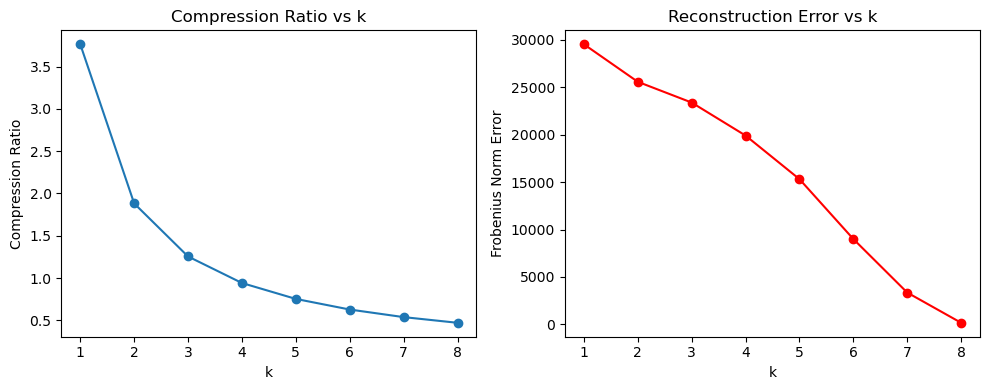

In [60]:
import matplotlib.pyplot as plt

errors = []
ratios = []

for k in range(1, 9):
    compressed_img = compress_image(img_array, k)
    err = reconstruction_error(img_array, compressed_img)
    errors.append(err)
    ratios.append(64 / (17 * k))

# Plotting
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 9), ratios, marker='o')
plt.title("Compression Ratio vs k")
plt.xlabel("k")
plt.ylabel("Compression Ratio")

plt.subplot(1, 2, 2)
plt.plot(range(1, 9), errors, marker='o', color='red')
plt.title("Reconstruction Error vs k")
plt.xlabel("k")
plt.ylabel("Frobenius Norm Error")
plt.tight_layout()
plt.show()


In [61]:
from numpy.linalg import norm

compression_ratios = []
reconstruction_errors = []
reconstructed_images = {}  # <--- This is critical

for k in range(1, 9):
    compressed = compress_image(img_array, k)

    # Save in dictionary
    reconstructed_images[k] = compressed

    # Compression ratio and error
    compression_ratio = 64 / (17 * k)
    compression_ratios.append(compression_ratio)

    error = norm(img_array - compressed, 'fro')
    reconstruction_errors.append(error)

    # Optional: Save image file
    Image.fromarray(compressed).save(f"compressed_k{k}.png")



--- Displaying Image Comparison ---


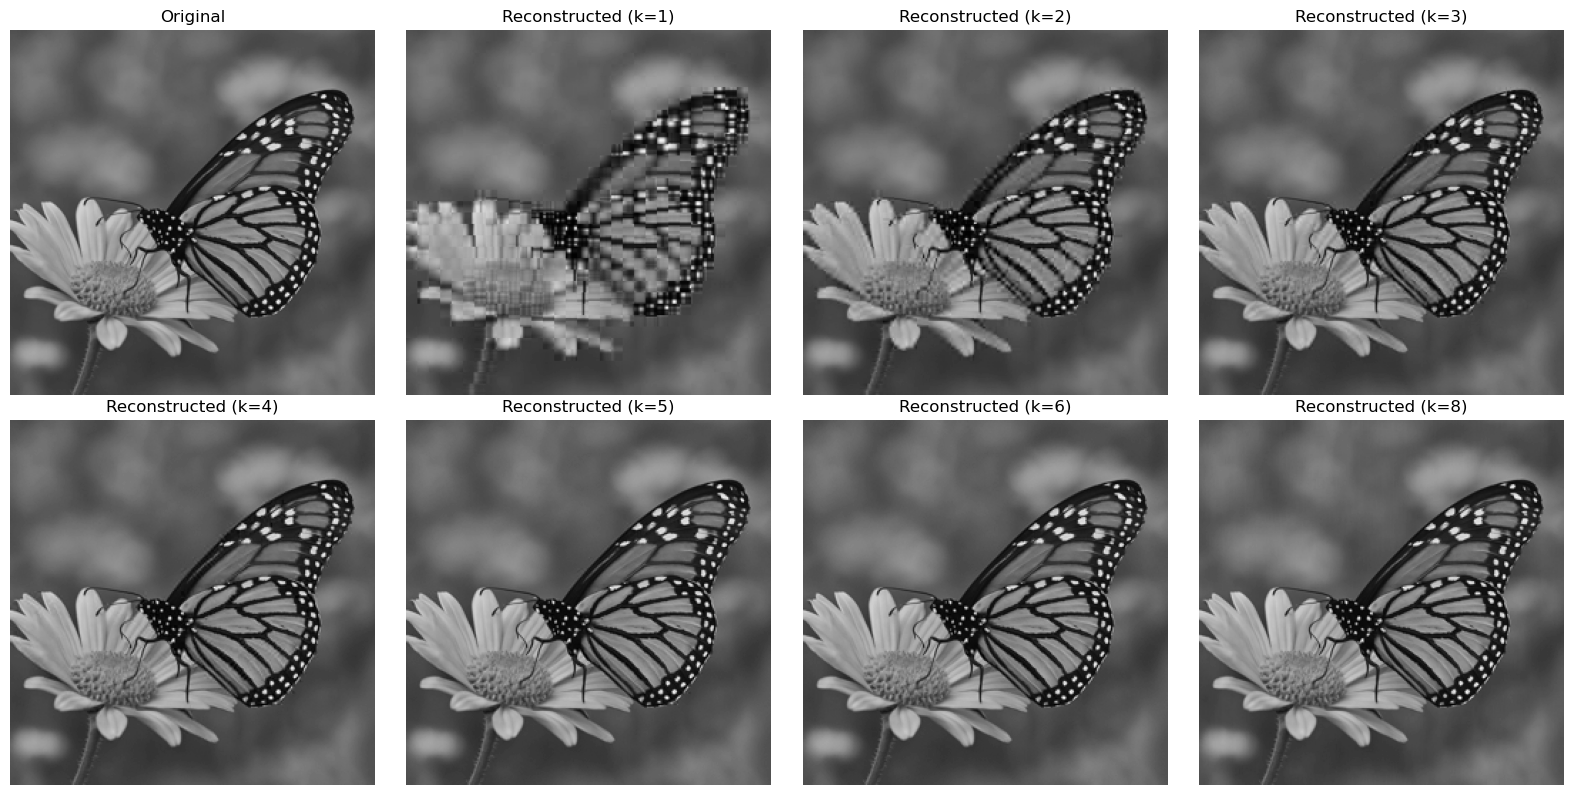


=== Jupyter Notebook Cells Finished ===


In [62]:
print("\n--- Displaying Image Comparison ---")

# Check if required data is available
if 'img_array' not in locals() or 'reconstructed_images' not in locals() or not reconstructed_images:
    print("Original or reconstructed images not found. Please run the previous cells.")
else:
    plt.figure(figsize=(16, 8))  # Adjust figure size as needed

    # Display Original Image
    plt.subplot(2, 4, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display Reconstructed Images for selected k values
    k_to_display = [1, 2, 3, 4, 5, 6, 8]
    plot_position = 2  # Start from subplot 2
    for k_disp in k_to_display:
        if k_disp in reconstructed_images:
            plt.subplot(2, 4, plot_position)
            plt.imshow(reconstructed_images[k_disp], cmap='gray')
            plt.title(f"Reconstructed (k={k_disp})")
            plt.axis('off')
            plot_position += 1
        else:
            print(f"Warning: Reconstructed image for k={k_disp} not found.")

    plt.tight_layout()
    plt.show()

print("\n=== Jupyter Notebook Cells Finished ===")
